In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Tuberculosis_Dataset.csv')
df = data.copy()
df.head()

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            400000 non-null  object 
 1   Year                               400000 non-null  int64  
 2   TB_Incidence_Rate                  400000 non-null  float64
 3   Population                         400000 non-null  int64  
 4   HIV_Prevalence                     400000 non-null  float64
 5   Treatment_Success_Rate             400000 non-null  float64
 6   Mortality_Rate                     400000 non-null  float64
 7   Urban_Population_Percentage        400000 non-null  float64
 8   Smoking_Rate                       400000 non-null  float64
 9   Alcohol_Consumption                400000 non-null  float64
 10  Healthcare_Expenditure_Per_Capita  400000 non-null  float64
 11  Primary_Healthcare_Access          4000

In [4]:
df.shape

(400000, 22)

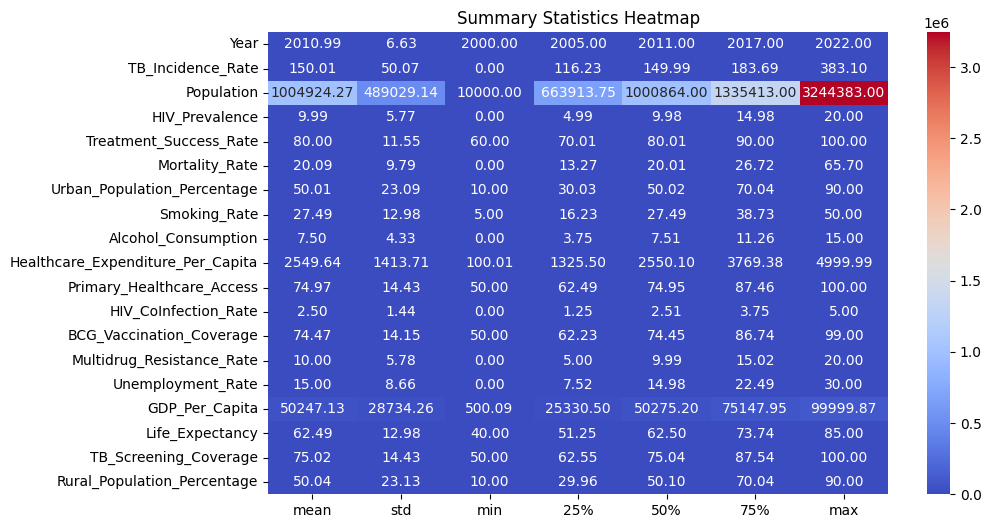

In [5]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
TB_Incidence_Rate                    0
Population                           0
HIV_Prevalence                       0
Treatment_Success_Rate               0
Mortality_Rate                       0
Urban_Population_Percentage          0
Smoking_Rate                         0
Alcohol_Consumption                  0
Healthcare_Expenditure_Per_Capita    0
Primary_Healthcare_Access            0
Age_Group                            0
Gender                               0
HIV_CoInfection_Rate                 0
BCG_Vaccination_Coverage             0
Multidrug_Resistance_Rate            0
Unemployment_Rate                    0
GDP_Per_Capita                       0
Life_Expectancy                      0
TB_Screening_Coverage                0
Rural_Population_Percentage          0
dtype: int64

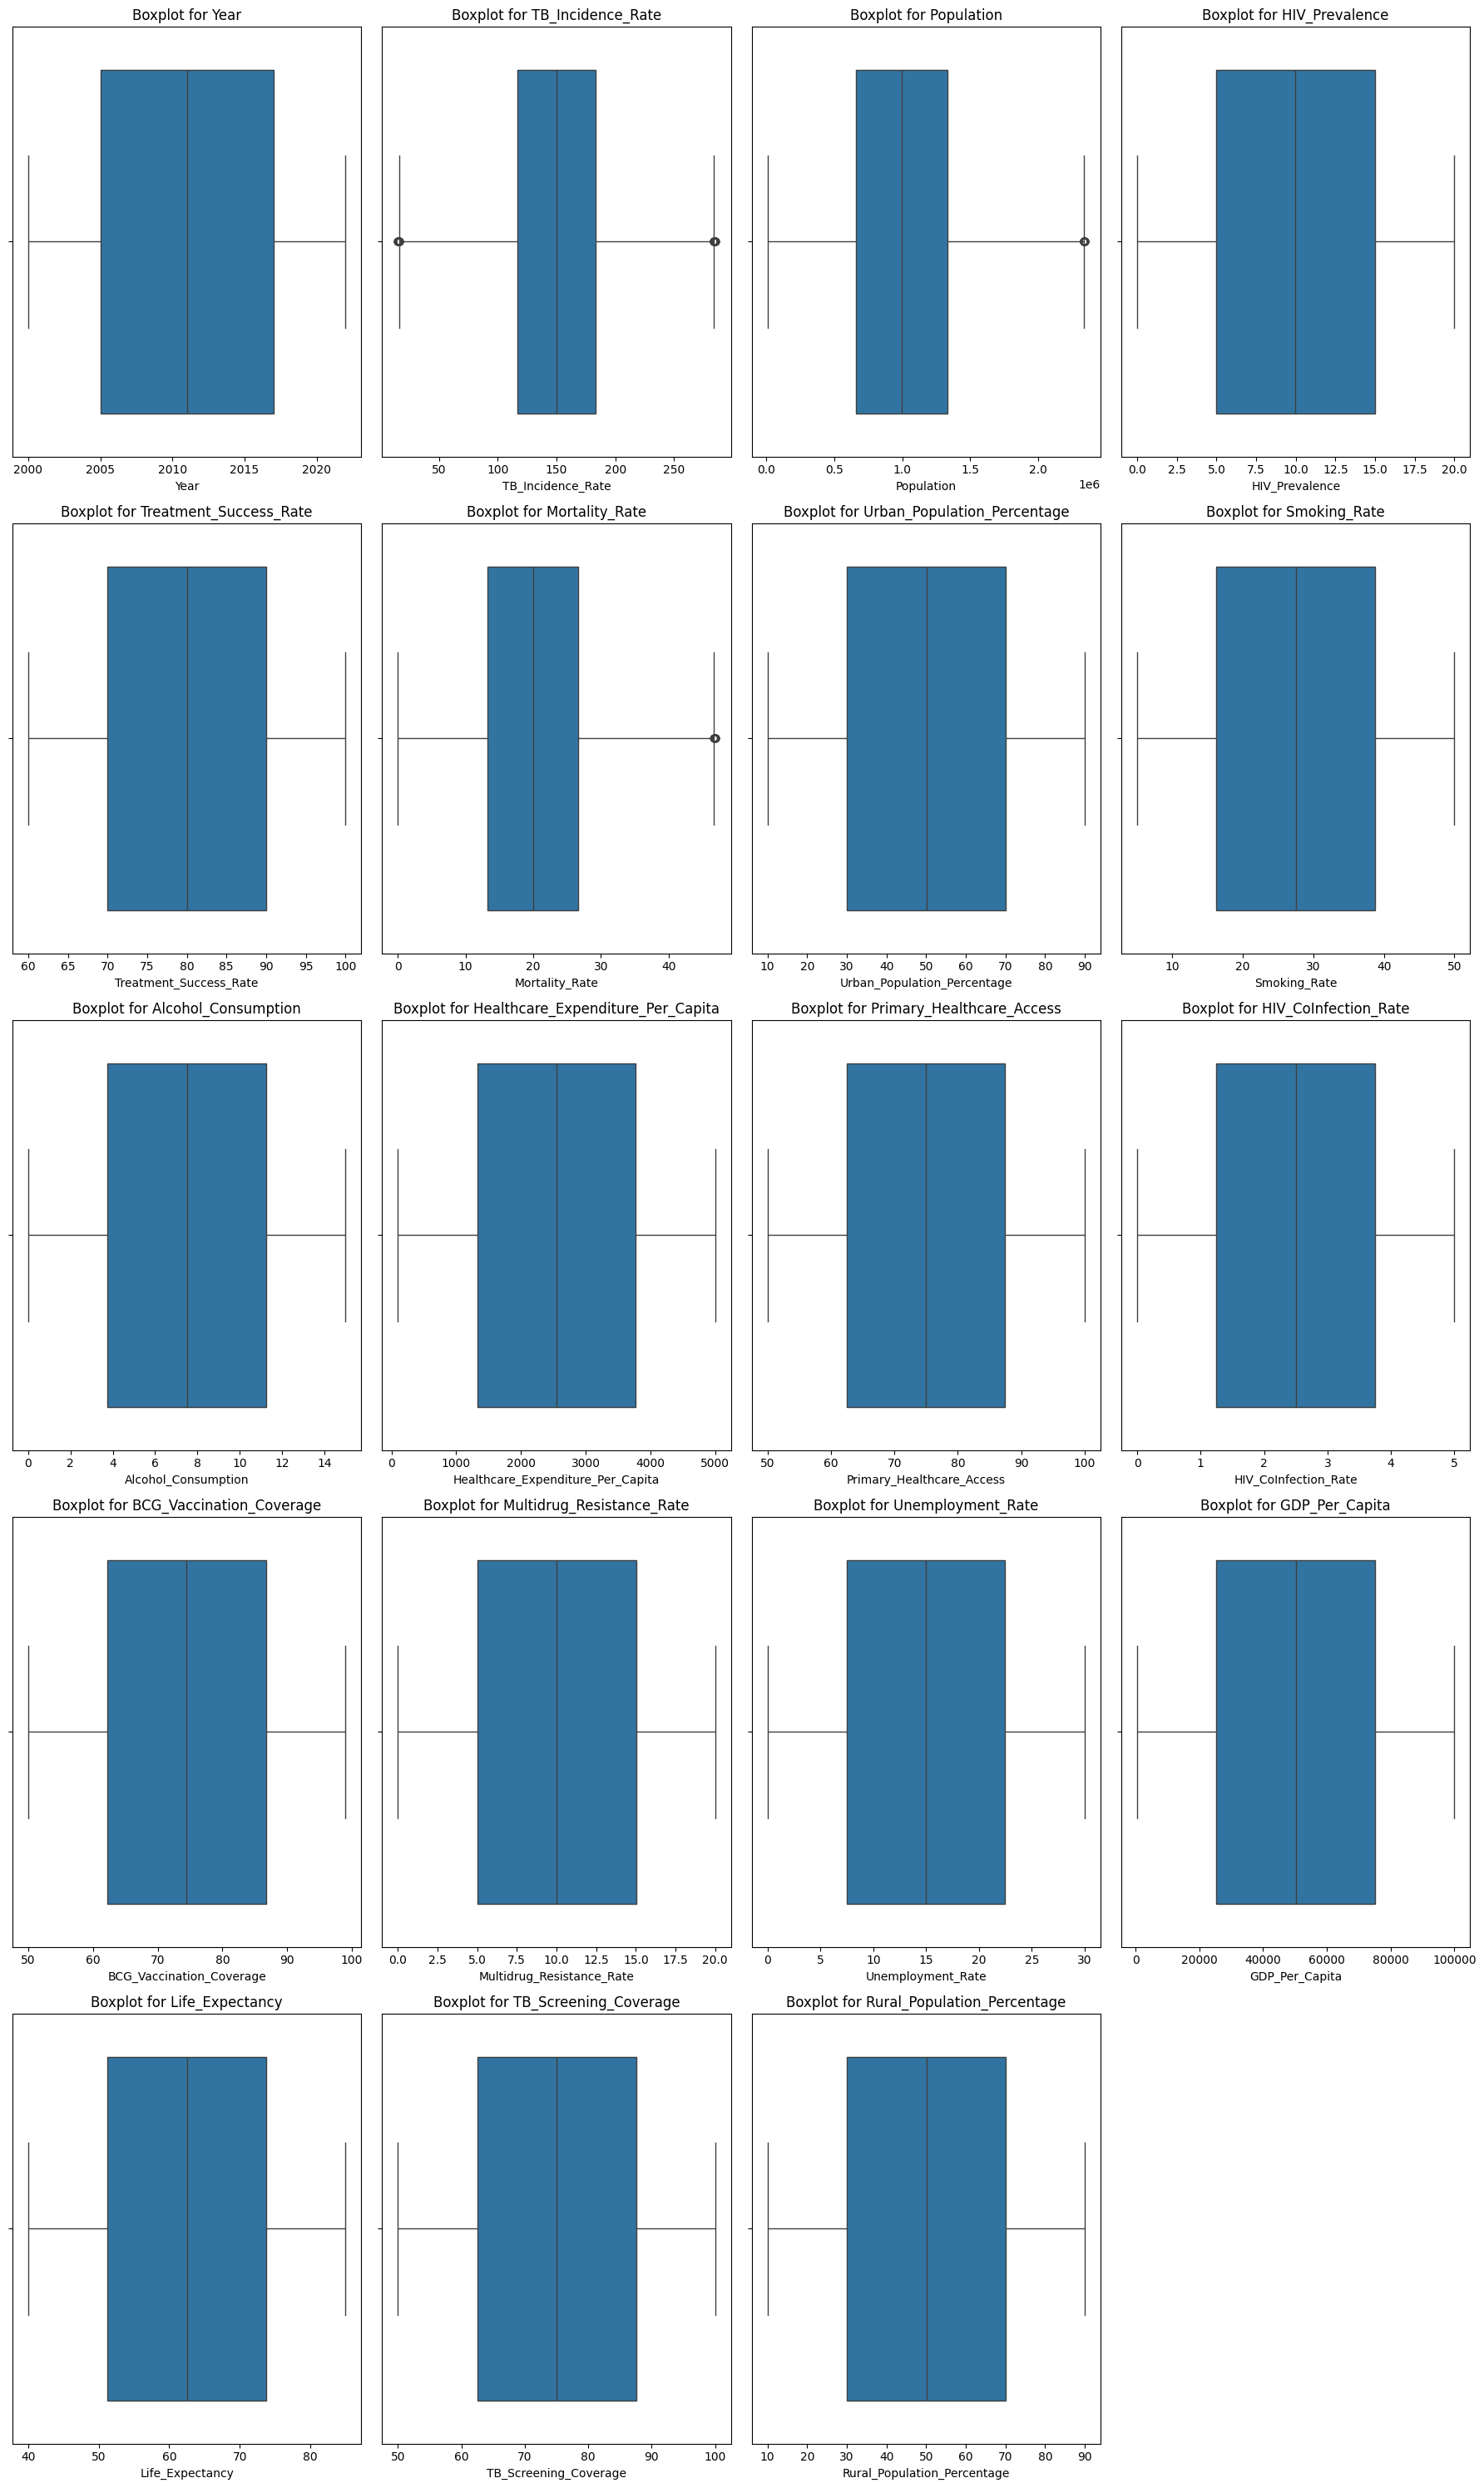

In [7]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_per_row = 4 
    num_rows = -(-num_columns // num_per_row)  

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(18, 6 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return df

df = remove_outliers(df)

In [8]:
sns.set_style('whitegrid')
colors = ['#1e2a38', '#3e5968', '#00b8b8', '#006f4f', '#2b3d4f', '#4f6f7e', '#00a5a5', '#005b46', '#284f63', '#5f797b']

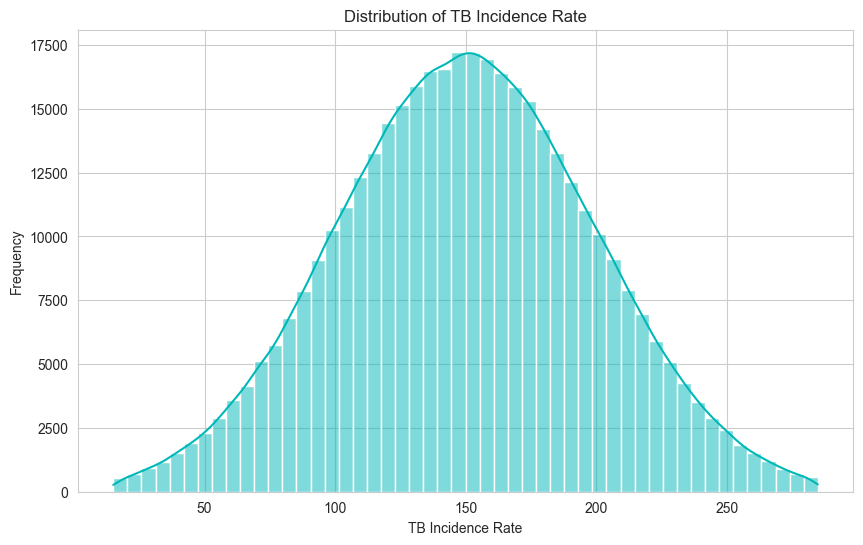

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TB_Incidence_Rate'], bins=50, kde=True, color=colors[2])
plt.title('Distribution of TB Incidence Rate')
plt.xlabel('TB Incidence Rate')
plt.ylabel('Frequency')
plt.show()

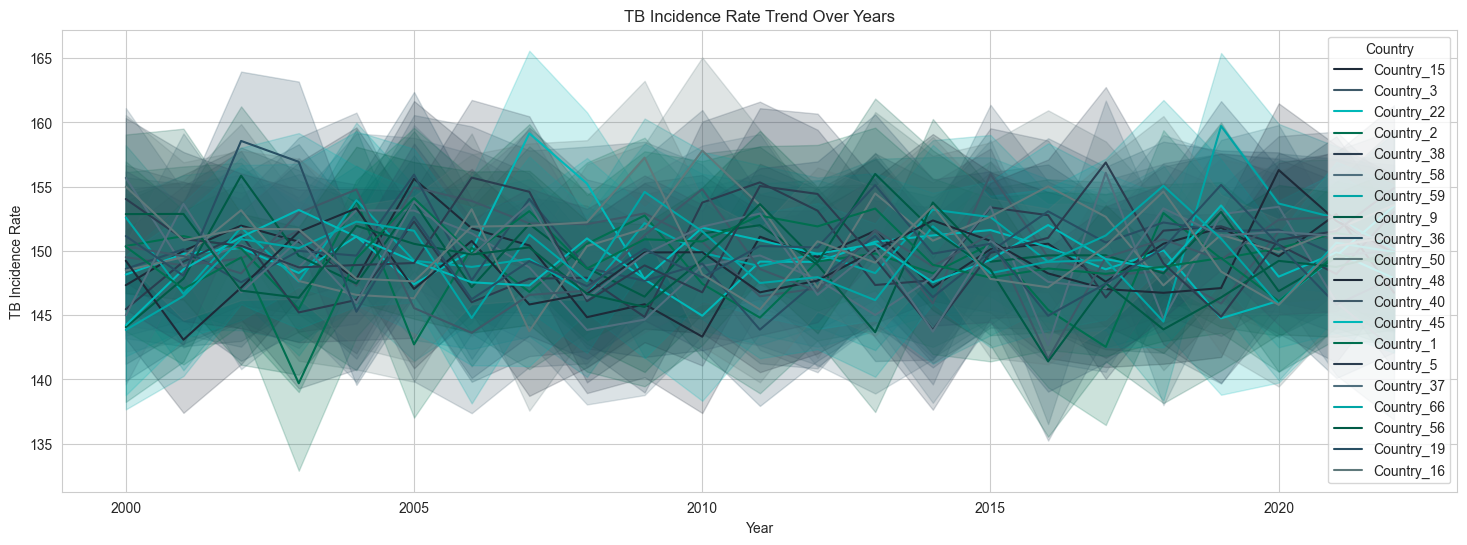

In [10]:
top_countries = df['Country'].value_counts().head(20).index
df_top_countries = df[df['Country'].isin(top_countries)]
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_top_countries, x='Year', y='TB_Incidence_Rate', hue='Country', palette=colors)
plt.title('TB Incidence Rate Trend Over Years')
plt.xlabel('Year')
plt.ylabel('TB Incidence Rate')
plt.show()

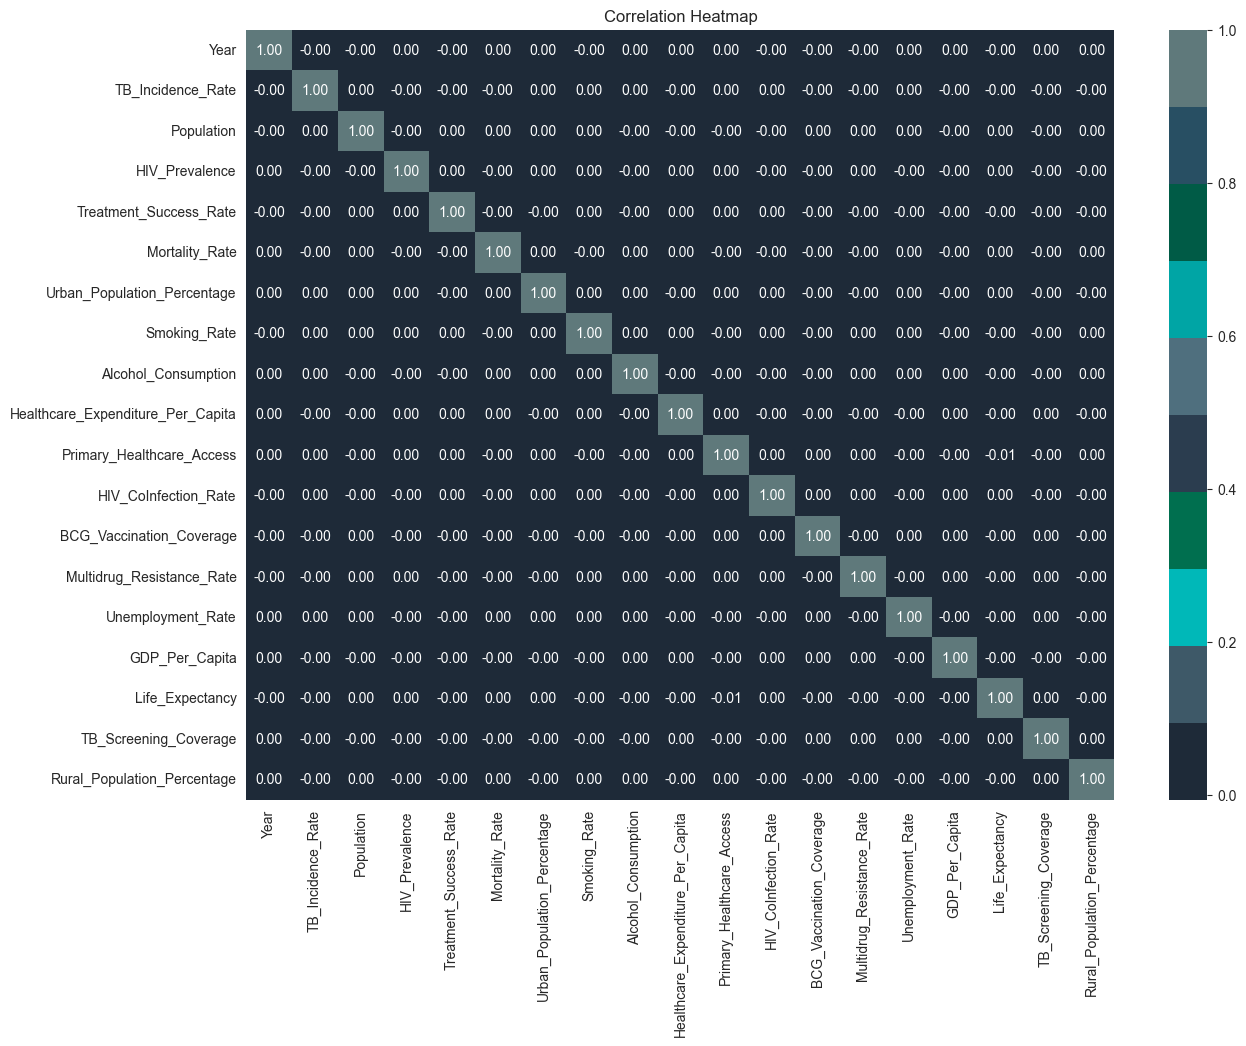

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap=colors)
plt.title('Correlation Heatmap')
plt.show()

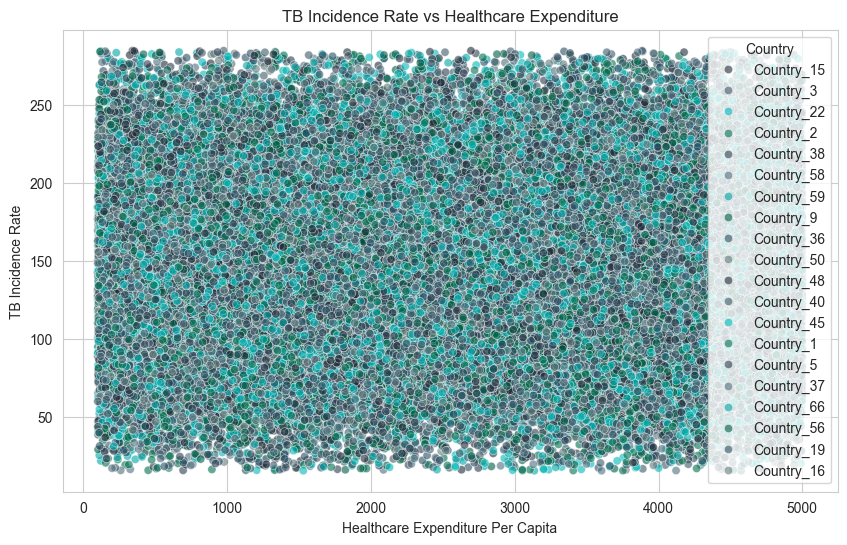

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_countries, x='Healthcare_Expenditure_Per_Capita', y='TB_Incidence_Rate', hue='Country', palette=colors, alpha=0.6)
plt.title('TB Incidence Rate vs Healthcare Expenditure')
plt.xlabel('Healthcare Expenditure Per Capita')
plt.ylabel('TB Incidence Rate')
plt.show()

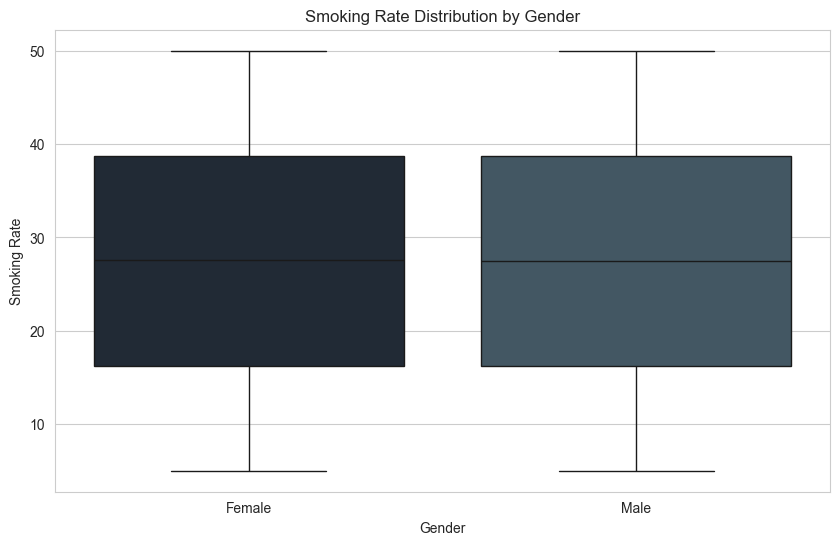

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Smoking_Rate', hue='Gender', palette=colors)
plt.title('Smoking Rate Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Smoking Rate')
plt.show()

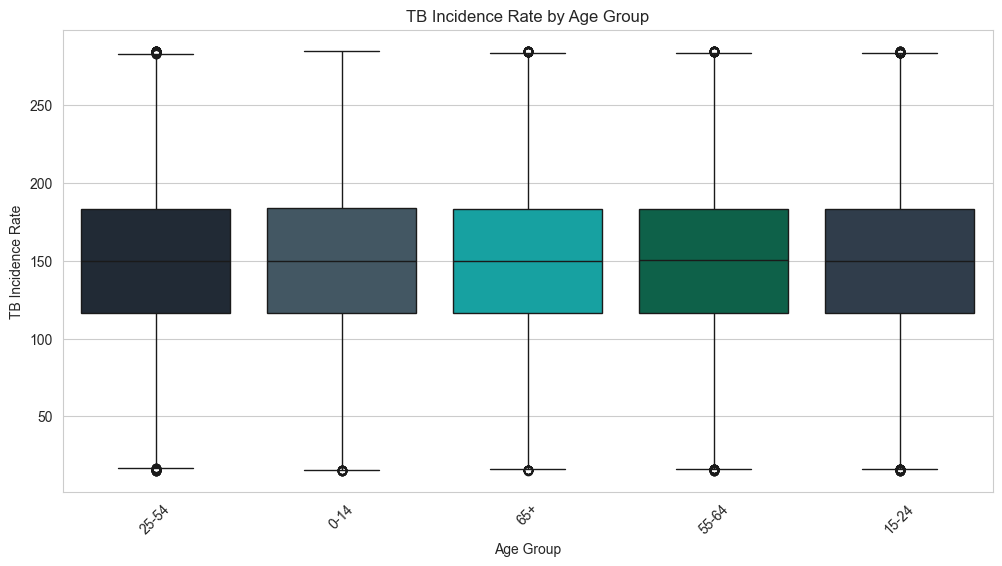

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='TB_Incidence_Rate', palette=colors)
plt.title('TB Incidence Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('TB Incidence Rate')
plt.xticks(rotation=45)
plt.show()

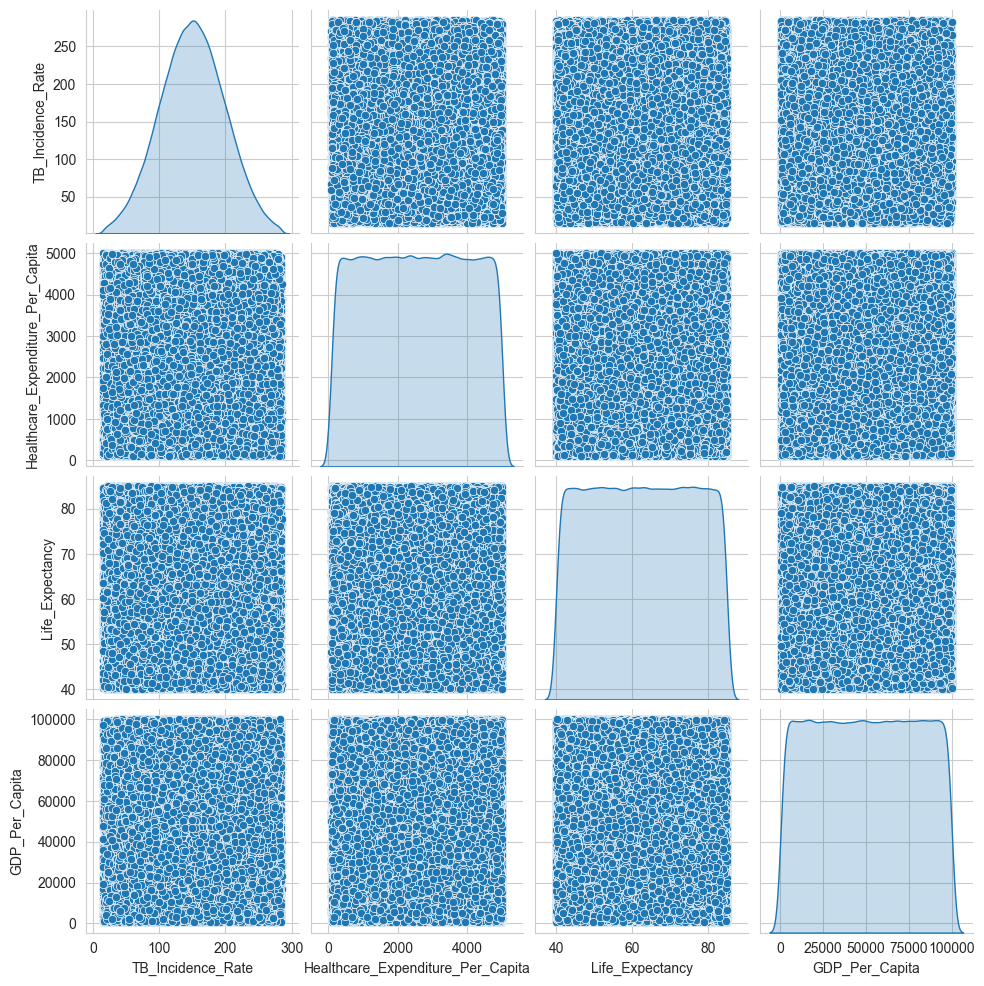

In [15]:
selected_features = ['TB_Incidence_Rate', 'Healthcare_Expenditure_Per_Capita', 'Life_Expectancy', 'GDP_Per_Capita']
sns.pairplot(df[selected_features], diag_kind='kde', palette=colors)
plt.show()

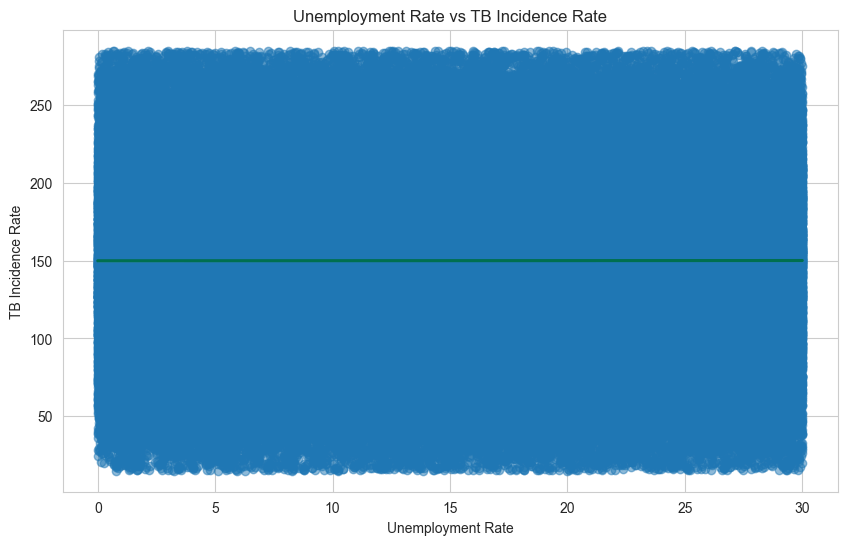

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Unemployment_Rate', y='TB_Incidence_Rate', scatter_kws={'alpha':0.5}, line_kws={'color':colors[3]})
plt.title('Unemployment Rate vs TB Incidence Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('TB Incidence Rate')
plt.show()

In [17]:
df = df.drop(columns=['Country'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394195 entries, 0 to 399999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               394195 non-null  int64  
 1   TB_Incidence_Rate                  394195 non-null  float64
 2   Population                         394195 non-null  int64  
 3   HIV_Prevalence                     394195 non-null  float64
 4   Treatment_Success_Rate             394195 non-null  float64
 5   Mortality_Rate                     394195 non-null  float64
 6   Urban_Population_Percentage        394195 non-null  float64
 7   Smoking_Rate                       394195 non-null  float64
 8   Alcohol_Consumption                394195 non-null  float64
 9   Healthcare_Expenditure_Per_Capita  394195 non-null  float64
 10  Primary_Healthcare_Access          394195 non-null  float64
 11  Age_Group                          394195 no

In [19]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Age_Group
0 -> 0-14
1 -> 15-24
2 -> 25-54
3 -> 55-64
4 -> 65+

Column: Gender
0 -> Female
1 -> Male



In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Mortality_Rate',axis = 1)
y = df['Mortality_Rate']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(315356, 20) (78839, 20)


In [22]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [23]:
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {knn_mse}")
print(f"R2 Score: {knn_r2}")

Mean Squared Error: 110.8377350378335
R2 Score: -0.19523715878751924


In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [25]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")

Mean Squared Error: 92.74550436692047
R2 Score: -0.00013657886454288004


In [26]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train),
y_pred = xgb_model.predict(X_test)

In [27]:
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {xgb_mse}")
print(f"R2 Score: {xgb_r2}")

Mean Squared Error: 93.88865134413179
R2 Score: -0.012463894508914386


In [28]:
models = ['KNN', 'XGBoost','Linear Regression']
mse_scores = [knn_mse, xgb_mse, lr_mse]
r2_scores = [knn_r2, xgb_r2, lr_r2]

mse_values = [f'{score:.4f}' for score in mse_scores]  
r2_values = [f'{score:.4f}' for score in r2_scores]    

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R^2': r2_values
})
print(results_df)

               Model       MSE      R^2
0                KNN  110.8377  -0.1952
1            XGBoost   93.8887  -0.0125
2  Linear Regression   92.7455  -0.0001
